In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data1.csv')

In [3]:
fd=df[df['OFFRNG_ID']==194]


In [4]:
fd=fd.drop('DATE_KEY',axis=1)
fd=fd.drop('OFFRNG_ID',axis=1)
fd=fd.drop('GEO_ID',axis=1)

In [5]:
fd['DATE'] = pd.to_datetime(fd['DATE'], errors='coerce')


In [6]:
per = fd.DATE.dt.to_period("M")  # new way to get the same

data = fd.groupby(per)

data=data.sum()

In [14]:
data = data.ix[1:]
data = data.ix[:-2]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [15]:
data.drop('NO_OF_WINS',axis=1)

,NO_OF_OPRTNTY_CREATD
DATE,
2017-03,4392
2017-04,1424
2017-05,8279
2017-06,6600
2017-07,8008
2017-08,7822
2017-09,5856
2017-10,6876
2017-11,8829


In [16]:
data.index

PeriodIndex(['2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08',
             '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02',
             '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08'],
            dtype='period[M]', name='DATE', freq='M')

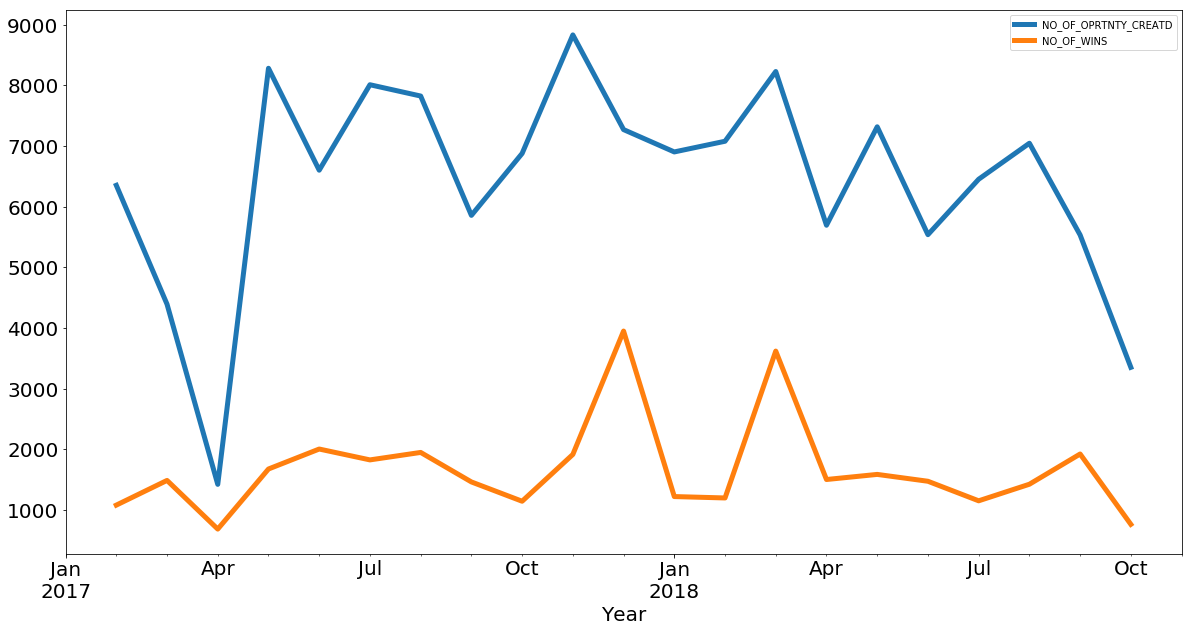

In [12]:
#EDA
import matplotlib.pyplot as plt
data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

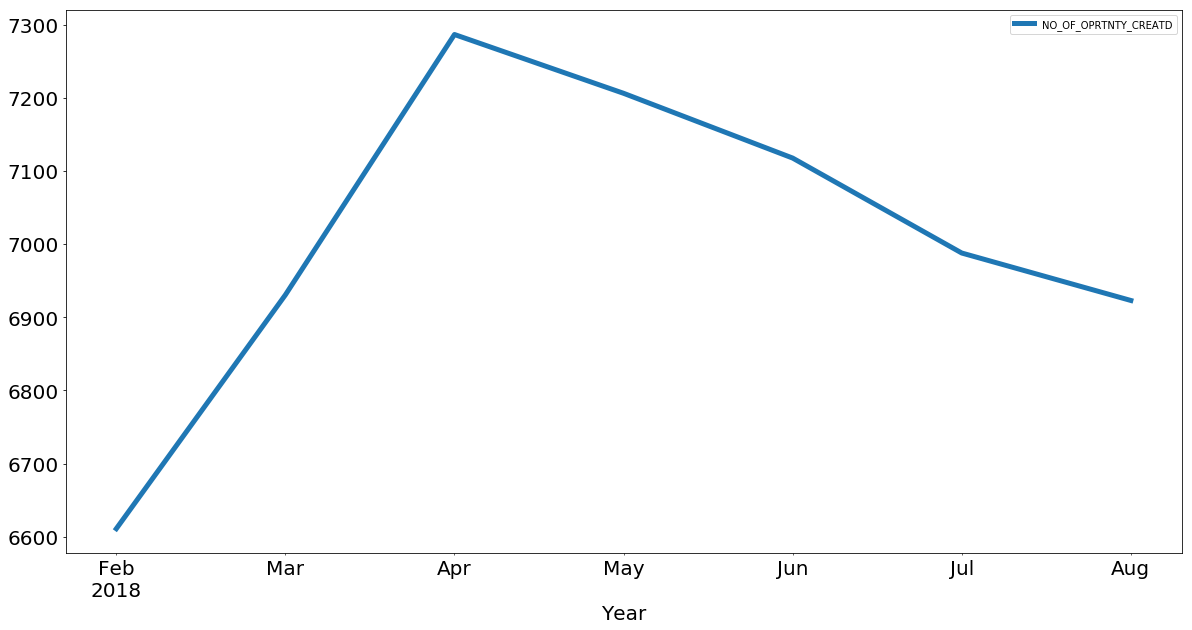

In [24]:
NO_OF_OPRTNTY_CREATD = data[['NO_OF_OPRTNTY_CREATD']]
NO_OF_OPRTNTY_CREATD.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

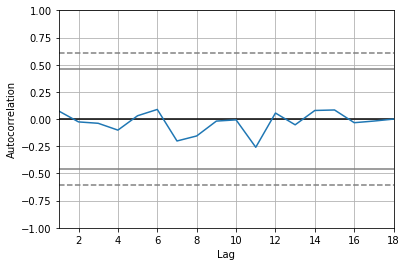

In [25]:
pd.plotting.autocorrelation_plot(		NO_OF_OPRTNTY_CREATD);

In [26]:
data.diff().corr()

,NO_OF_OPRTNTY_CREATD,NO_OF_WINS
NO_OF_OPRTNTY_CREATD,1.000000,0.360118
NO_OF_WINS,0.360118,1.000000


In [29]:
#TEST for leads
# Applying Seasonal ARIMA model to forcast the data 
import statsmodels.api as sm
mod = sm.tsa.SARIMAX(data['NO_OF_OPRTNTY_CREATD'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

ValueError: maxlag should be < nobs

In [31]:
from statsmodels.tsa.arima_model import ARIMA

# fit model
model = ARIMA(data, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.title('ARMA Fit Residual Error Line Plot')
plt.show()

residuals.plot(kind='kde')
plt.title('ARMA Fit Residual Error Density Plot')
plt.show()
print(residuals.describe())

TypeError: can only concatenate str (not "list") to str

In [39]:
import urllib3, requests, json

# retrieve your wml_service_credentials_username, wml_service_credentials_password, and wml_service_credentials_url from the
# Service credentials associated with your IBM Cloud Watson Machine Learning Service instance

wml_credentials={
"url": "https://ibm-watson-ml.mybluemix.net",
"username": "c1ef4b80-2ee2-458e-ab92-e9ca97ec657d",
"password": "030528d4-5a3e-4d4c-9258-5d553513be6f"
}

headers = urllib3.util.make_headers(basic_auth='{c1ef4b80-2ee2-458e-ab92-e9ca97ec657d}:{030528d4-5a3e-4d4c-9258-5d553513be6f}'.format(username=wml_credentials['username'], password=wml_credentials['password']))
url = '{}/v3/identity/token'.format(wml_credentials['https://ibm-watson-ml.mybluemix.net'])
response = requests.get(url, headers=headers)
mltoken = json.loads(response.text).get('token')

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

# NOTE: manually define and pass the array(s) of values to be scored in the next line
payload_scoring = {"fields": ["GENDER", "AGE", "MARITAL_STATUS", "PROFESSION"], "values": [array_of_values_to_be_scored, another_array_of_values_to_be_scored]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/v3/wml_instances/6f921b42-0a76-47e2-8918-390a40b31b7f/deployments/6daa7edd-6139-403f-9db4-6269d3ef17e7/online', json=payload_scoring, headers=header)
print("Scoring response")
print(json.loads(response_scoring.text))

KeyError: 'c1ef4b80-2ee2-458e-ab92-e9ca97ec657d'